<a href="https://colab.research.google.com/github/manaswinit26/assignment3/blob/main/Copy_of_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [2]:
# 1
# 5 columns
import pandas as pd
url="https://raw.githubusercontent.com/manaswinit26/assignment3/main/data/car_data.csv"
df1 = pd.read_csv(url,low_memory=False)
print(df1.columns)
df1.head()

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [5]:
# 1000 rows, 5 columns
df1.shape

(1000, 5)

In [6]:
# 2
df1.describe()



,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [7]:
# 2
# any missing values? no
df1['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [8]:
# 2
# converting gender into dummy variable
df1['G'] = 0 # dummy variable is G
df1.loc[df1['Gender']== 'Female', 'G'] = 1
df1['G'].value_counts()

1    516
0    484
Name: G, dtype: int64

In [10]:
# 2
# X matrix
preds = ['Age','AnnualSalary']
X = df1.loc[:,preds]
y = df1['Purchased']
X

,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000
...,...,...
995,38,59000
996,47,23500
997,28,138500
998,48,134000


In [11]:
# 3
def maxmin(x): # maxmin-normalization function
 x = (x-min(x))/(max(x)-min(x))
 return x
X = X.apply(maxmin) # Apply maxmin normalization function to all columns of X
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [12]:
# 4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

[ 6 16]


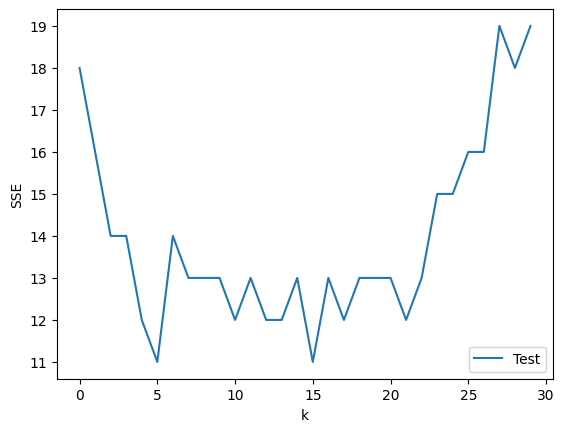

In [18]:
 # 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# optimal k
k_bar = 30
k_grid = np.arange(1,k_bar) # range of k's
SSE = np.zeros(k_bar) # sum of squared error
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # sk model for k
  fitted_model = model.fit(X_train,y_train) # training model
  y_hat = fitted_model.predict(X_test) # test set predicted values
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # computed SSE

SSE_min = np.min(SSE) # lowest sse
min_index = np.where(SSE==SSE_min) # indices of y that = minimum
k_star = k_grid[min_index] # optimal value of k
print(k_star)
plt.plot(np.arange(0,k_bar),SSE,label='Test') # plotting sse for k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

# the optimal k is at around 16

In [21]:
# 6
model = KNeighborsClassifier(n_neighbors=16) # sk model for k
fitted_model = model.fit(X_train,y_train) #training model on data
y_hat = fitted_model.predict(X_test) # test set predicted values
pd.crosstab(y_test, y_hat)


# Most cases are predicted early since 0s are at 0s and 1s are at 1s.
# There are 5 times times where 0 is classified as a 1 and 6 times where 1 is classified as a 0, but this is 11/200=.055 proportion of cases.
# The overall accuracy is 189/200=.945 proportion of cases.

col_0,0,1
Purchased,,
0,120,5
1,6,69


In [23]:
# 7
# resplit data with gender variable
from sklearn.model_selection import train_test_split
vars = ['Age','AnnualSalary','Gender']
X = df1.loc[:,vars]
y = df1['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

# use selected k to train model without gender variable
model = KNeighborsClassifier(n_neighbors=16)
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train)
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1))

# separate the true/predicted values by recorded sex:
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

In [24]:
# female
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,57,5
1,12,35


In [25]:
# male
pd.crosstab(y_M, y_hat_M)


col_0,0,1
Purchased,,
0,59,4
1,7,21




For men, about 80/91 = .879 are correct, while for women, about 92/109 =
.844. It seems like the model does better at predicting what male customers will do.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [29]:
# 1
url2="https://raw.githubusercontent.com/manaswinit26/assignment3/main/data/USA_cars_datasets.csv"
usacars = pd.read_csv(url2,low_memory=False)

df2 = usacars[['price', 'year', 'mileage']]

In [31]:
print(df2['price'].isna().sum())
print(df2['year'].isna().sum())
print(df2['mileage'].isna().sum())
 # no NAs to handle

0
0
0


In [32]:
df2.shape
# 2499 rows, 3 columns

(2499, 3)

In [33]:
df2.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [35]:
# 2
preds2 = ['year','mileage']
X = df2.loc[:,preds2]
y = df2['price']

def maxmin(x): # maxmin-normalization function
 x = (x-min(x))/(max(x)-min(x))
 return x
X = X.apply(maxmin) # Apply maxmin normalization function to all columns of X
X.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [36]:
# 3

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

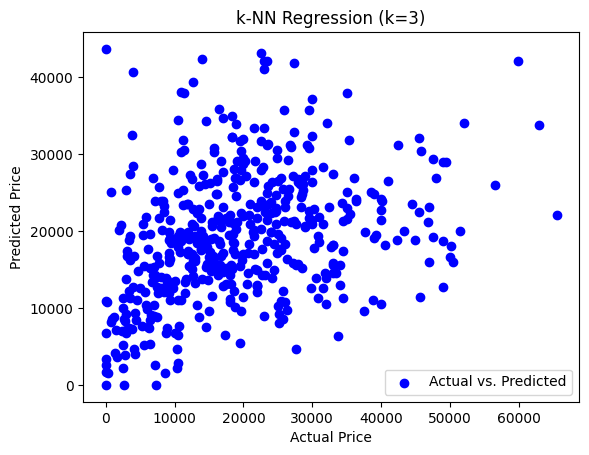

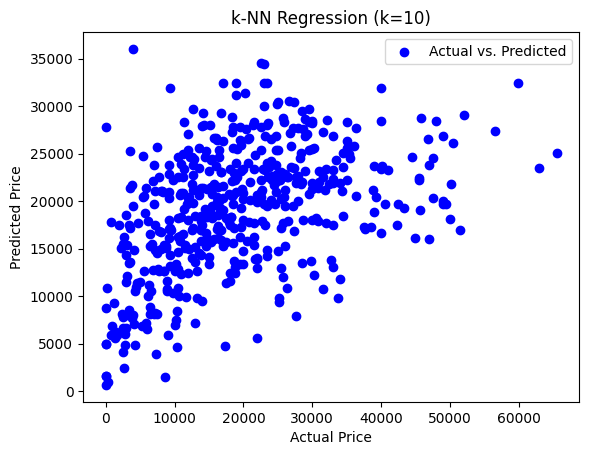

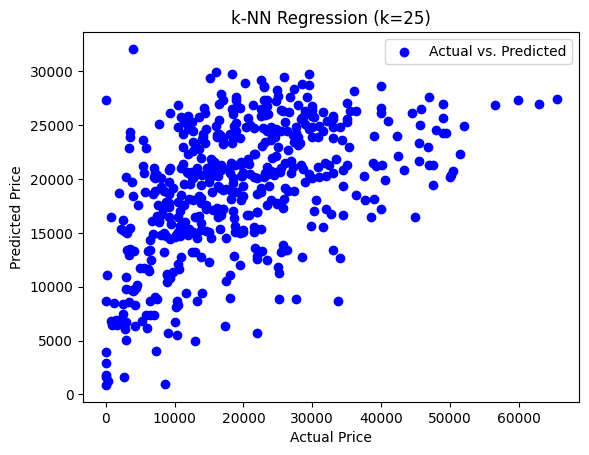

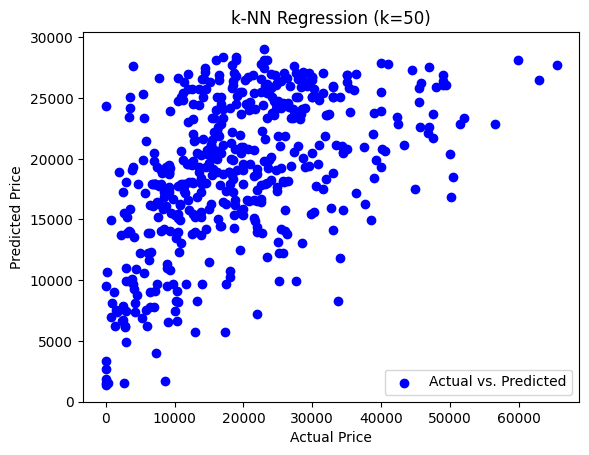

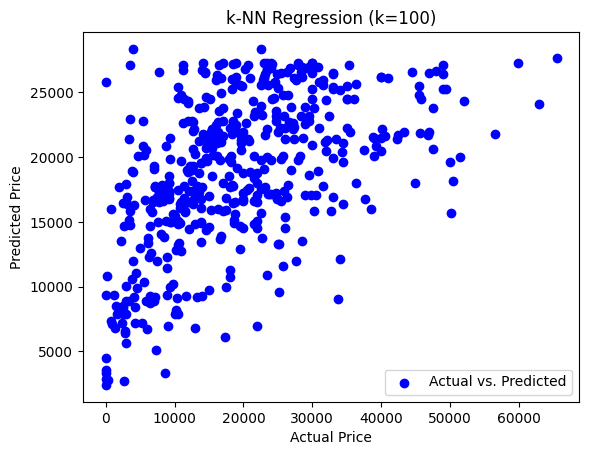

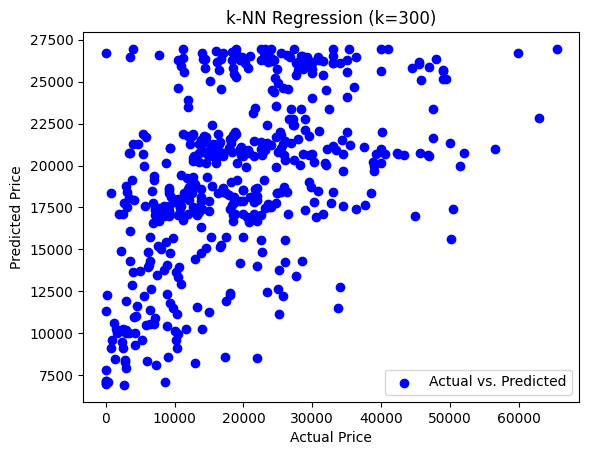

In [59]:
# 4
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]
sse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sse = mean_squared_error(y_test, y_pred)
    sse_values.append(sse)

    plt.figure()
    plt.scatter(y_test, y_pred, c='b', label='Actual vs. Predicted')
    plt.title(f'k-NN Regression (k={k})')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.show()

# 4
As k increases, the predicted price decreases and the overall shape of the points flattens out.

[69]


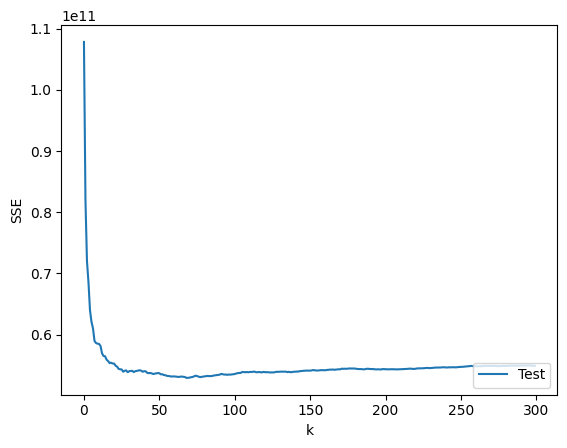

In [62]:
# 5
k_bar = 300
k_grid = np.arange(1,k_bar) # range of k's
SSE = np.zeros(k_bar) # sum of squared error
for k in range(k_bar):
  model = KNeighborsRegressor(n_neighbors=k+1) # sk model for k
  fitted_model = model.fit(X_train,y_train) # training model
  y_hat = fitted_model.predict(X_test) # test set predicted values
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # computed SSE

SSE_min = np.min(SSE) # lowest sse
min_index = np.where(SSE==SSE_min) # indices of y that = minimum
k_star = k_grid[min_index] # optimal value of k
print(k_star)
plt.plot(np.arange(0,k_bar),SSE,label='Test') # plotting sse for k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

# optimal k based on plot is 69

# 6
As k increases, it can lead to underfitting. This is because a higher k will take more of the data into account, and reduce the flexibility of the model. This is shown by the scatterplots, as when k increases, the points are made to go under a certain "line".

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [39]:
# 1
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

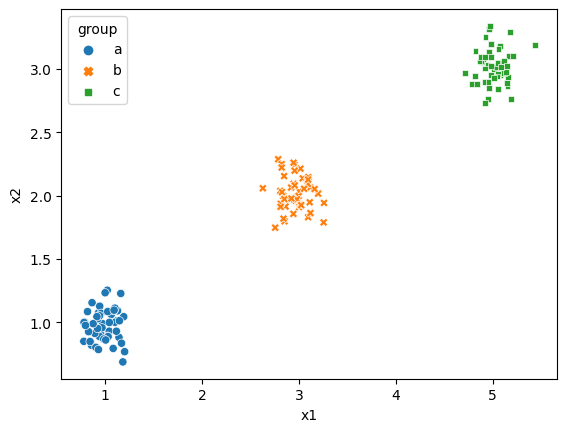

In [40]:
# 2
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

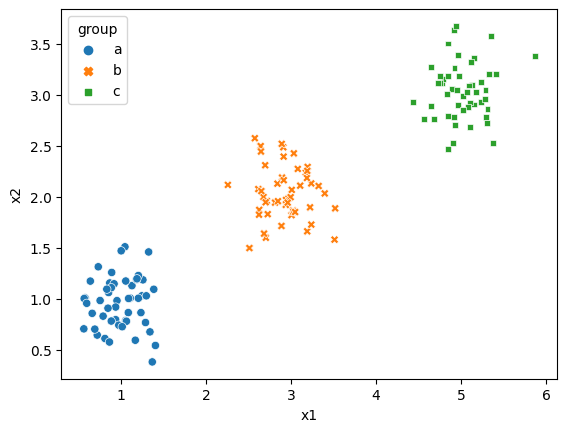

In [41]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

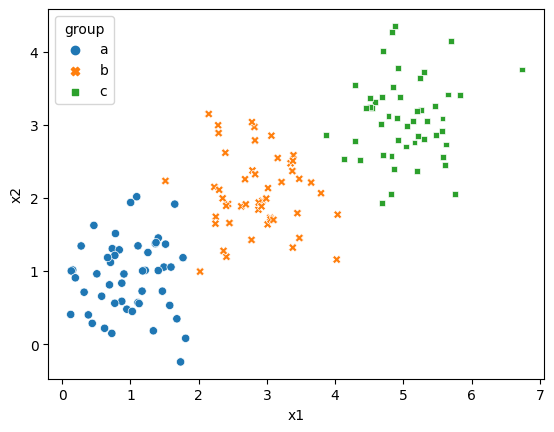

In [42]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

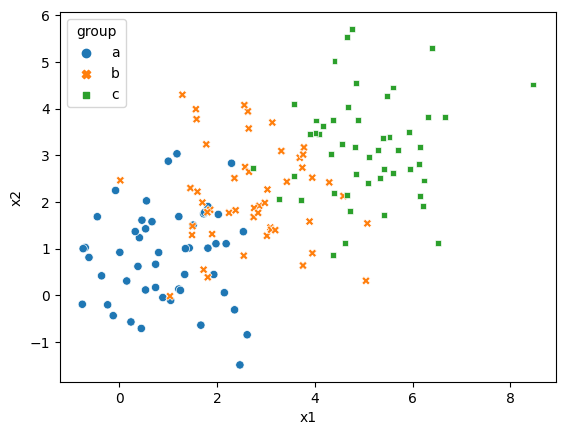

In [43]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

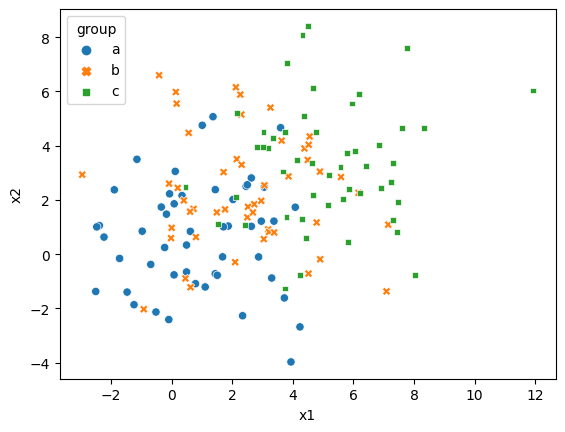

In [44]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

# 2
As the noise increases, the clusters spread together. When noise = 0.125 the clusters are completely separate. When noise=2.0, the clusters are joined together and you won't be able to tell where a point belongs.

In [46]:
def maxmin(x): # Max-min scaler function
  x = (x-min(x))/(max(x)-min(x))
  return x

def scree(data):
  X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
  X = X.apply(maxmin) # Normalize the data
  k_bar = 15
  k_grid = np.arange(1,k_bar+1) # The range of k's to consider
  SSE = np.zeros(k_bar) # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) #
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE
  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
  axes.set_ylim(0, 35)

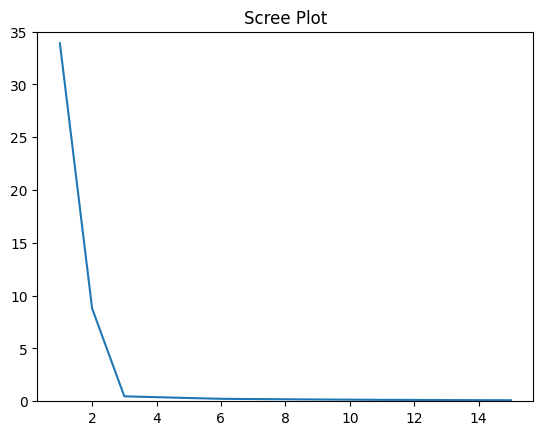

In [47]:
scree( data = df0_125 )

# can definitively select elbow at k = 3

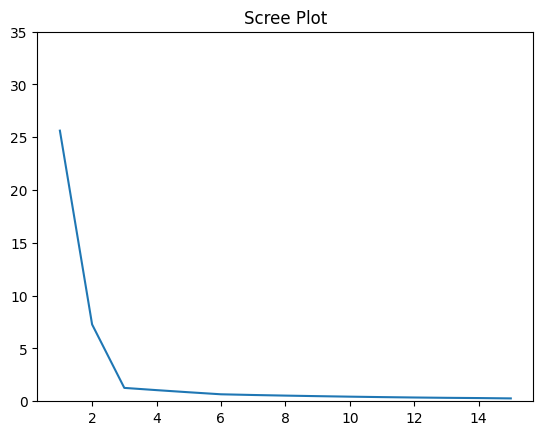

In [48]:
scree( data = df0_25 )

# can still definitely select elbow at k = 3

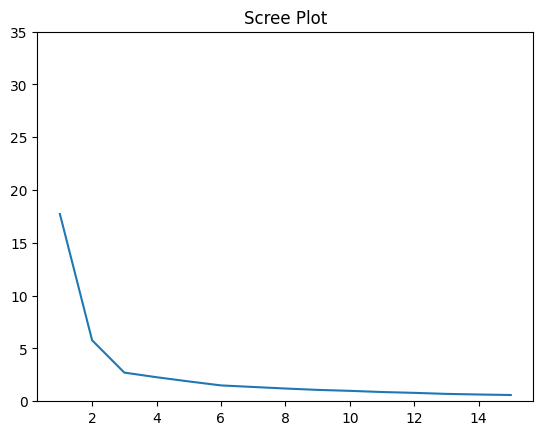

In [49]:
scree( data = df0_5 )

# elbow still visible at k = 3

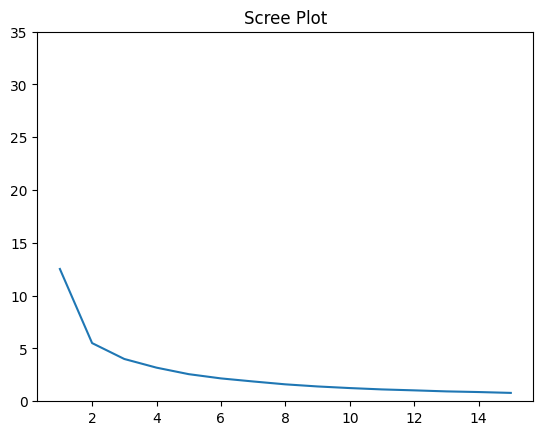

In [50]:
scree( df1_0 )

# elbow might be k = 2 now

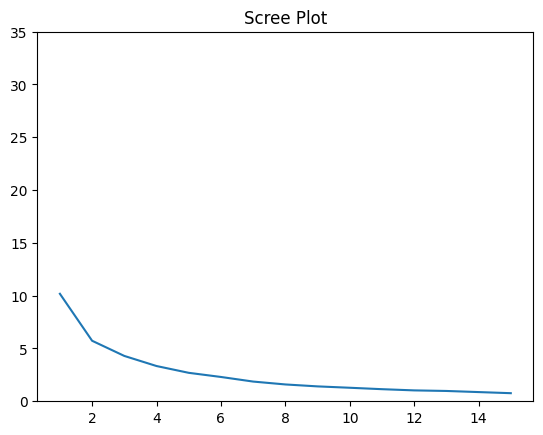

In [51]:
scree( df2_0 )

# elbow is not visible

# 4
When the noise is low, the elbow is distinct. As the noise goes up, the elbow becomes less aparent. This follows the same pattern as the scatter plots with the clusters, where the overlap increases as noise increases.